# Naive Bayes
This notebook will implement the Naive Bayes classifier - first using the sklearn module `GaussianNB` (part 1) and then from scratch (part 2). 

---
## Part 1: Naive Bayes with sklearn
The following code is based on: https://www.geeksforgeeks.org/naive-bayes-classifiers/

In [15]:
# import basic packages
import pandas as pd
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 

In [8]:
# load the iris dataset 
iris = load_iris()

In [9]:
# store the feature matrix (X) and response vector (y) 
X = iris.data 
y = iris.target 

In [11]:
# split X and y into training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 4), (60, 4), (90,), (60,))

In [12]:
# instantiate and train the model on the training set 

gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
# make predictions on the testing set 
y_pred = gnb.predict(X_test) 
y_pred

array([0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1])

In [20]:
# compare true response values (y_test) with predicted response values (y_pred) 

print(f"Gaussian Naive Bayes model accuracy is {metrics.accuracy_score(y_test, y_pred)*100}%.")

Gaussian Naive Bayes model accuracy is 95.0%.


---
## Part 2: Naive Bayes from scatch
The following code is based on: https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/

In [27]:
# import basic packages
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# generate 100 examples with two numerical input variables, each assigned one of two classes (0/1)
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

# summarize classification dataset
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(100, 2) (100,)
[[-0.79415228  2.10495117]
 [-9.15155186 -4.81286449]
 [-3.10367371  3.90202401]
 [-1.42946517  5.16850105]
 [-7.4693868  -4.20198333]]
[0 1 0 0 1]


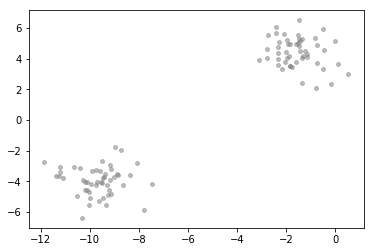

In [96]:
# plot the X values
plt.scatter(X[:,0], X[:,1], alpha=0.5, color='gray', s=15);

Next, we model the numerical input variables using a Gaussian probability distribution. 

Therefore, we first estimate the parameters of the Gaussian distribution (mean, std) from the dataset using the np.mean() and np.std() functions from NumPy. Then we construct a normal distribution by specifying the parameters of the distribution, e.g. the mean and standard deviation. This can be done using the norm SciPy API. 

Let us combining both steps in a function called `fit_distribution()`, which takes a sample of data for one variable and fits a data distribution.

In [70]:
# fit a probability distribution to a univariate data sample

def fit_distribution(data):
    # estimate parameters
    mu = np.mean(data)
    sigma = np.std(data)
    print(mu, sigma)
    # fit distribution
    dist = norm(mu, sigma)
    return dist, mu

Since we are interested in the **conditional** probability of each input variable, we need one distribution for each of the input variables, and one set of distributions for each of the class labels, hence **four** distributions in total.

To compure the conditional probabilities, we first split the data into groups of samples for each of the class labels (0/1).

In [42]:
# split data into classes

X_y0 = X[y == 0]
X_y1 = X[y == 1]
X_y0.shape, X_y1.shape

((50, 2), (50, 2))

Based on these groups we can calculate the **prior probabilities** for a data sample belonging to each group. We expect this to be exactly 50%, given that we have created the same number of examples in each of the two classes.

In [43]:
# calculate priors

prior_y0 = len(X_y0) / len(X)
prior_y1 = len(X_y1) / len(X)
prior_y0, prior_y1

(0.5, 0.5)

Finally, we call the `fit_distribution()` function (see above) that returns a probability distribution for each variable, given each class label.

In [82]:
# create PDFs for y==0
dist_X1y0, mu_X1y0 = fit_distribution(X_y0[:, 0])
dist_X2y0, mu_X2y0 = fit_distribution(X_y0[:, 1])

# create PDFs for y==1
dist_X1y1, mu_X1y1 = fit_distribution(X_y1[:, 0])
dist_X2y1, mu_X2y1 = fit_distribution(X_y1[:, 1])

-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367
-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521


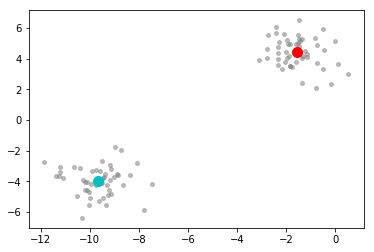

In [94]:
# plot the X values and the means of both distributions
plt.scatter(X[:,0], X[:,1], alpha=0.5, color='gray', s=15);
plt.plot(mu_X1y0,mu_X2y0, 'ro', markersize=10);
plt.plot(mu_X1y1,mu_X2y1, 'co', markersize=10);

Next, we can use the prepared probabilistic model to make a prediction. The **independent conditional probability** for each class label can be calculated using the **prior** for the class (50%) and the **conditional probability** of the value for each variable.

The `probability()` function below performs this calculation for one input example (array of two values) given the prior and conditional probability distribution for each variable. The value returned is a score rather than a probability as the quantity is not normalized, a simplification often performed when implementing naive bayes.

In [58]:
# calculate the independent conditional probability
def probability(X, prior, dist1, dist2):
    return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

We can use this function to calculate the probability for an example belonging to each class. First, we select an example to be classified; in this case, the first example in the dataset.

In [59]:
# classify one example
Xsample, ysample = X[0], y[0]

Now we can calculate the score of the example belonging to the first class, then the second class, then report the results.

In [62]:
py0 = probability(Xsample, prior_y0, dist_X1y0, dist_X2y0)
py1 = probability(Xsample, prior_y1, dist_X1y1, dist_X2y1)
print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))

P(y=0 | [-0.79415228  2.10495117]) = 0.348
P(y=1 | [-0.79415228  2.10495117]) = 0.000


The class with the largest score will be the resulting classification, here the class y=0. (Note that these are unnormalized probabilities, hence they do not sum to 1).

---
Let's combine all steps above into one cell.

In [53]:
# summarize probability distributions of the dataset
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import norm
from numpy import mean, std

# fit a probability distribution to a univariate data sample
def fit_distribution(data):
    # estimate parameters
    mu = mean(data)
    sigma = std(data)
    print(mu, sigma)
    # fit distribution
    dist = norm(mu, sigma)
    return dist

# calculate the independent conditional probability
def probability(X, prior, dist1, dist2):
    return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

# sort data into classes
X_y0 = X[y == 0]
X_y1 = X[y == 1]
print(X_y0.shape, X_y1.shape)

# calculate priors
prior_y0 = len(X_y0) / len(X)
prior_y1 = len(X_y1) / len(X)
print(prior_y0, prior_y1)

# create PDFs for y==0
dist_X1y0 = fit_distribution(X_y0[:, 0])
dist_X2y0 = fit_distribution(X_y0[:, 1])

# create PDFs for y==1
dist_X1y1 = fit_distribution(X_y1[:, 0])
dist_X2y1 = fit_distribution(X_y1[:, 1])

# classify one example
Xsample, ysample = X[0], y[0]
py0 = probability(Xsample, prior_y0, dist_X1y0, dist_X2y0)
py1 = probability(Xsample, prior_y1, dist_X1y1, dist_X2y1)
print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))
print('Truth: y=%d' % ysample)

(50, 2) (50, 2)
0.5 0.5
-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367
-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521
P(y=0 | [-0.79415228  2.10495117]) = 0.348
P(y=1 | [-0.79415228  2.10495117]) = 0.000
Truth: y=0


For comparison, run the same example with sklearn's Naive Bayes Classifier module.

In [54]:
from sklearn.naive_bayes import GaussianNB

# define the model
model = GaussianNB()

# fit the model
model.fit(X, y)

# select a single sample
Xsample, ysample = [X[0]], y[0]

# make a probabilistic prediction
yhat_prob = model.predict_proba(Xsample)
print('Predicted Probabilities: ', yhat_prob)

# make a classification prediction
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
print('Truth: y=%d' % ysample)

Predicted Probabilities:  [[1.00000000e+00 5.52387327e-30]]
Predicted Class:  [0]
Truth: y=0
